# MNIST Dataset

## Overview

The MNIST (Modified National Institute of Standards and Technology) dataset is one of the most popular datasets in the field of machine learning and computer vision. It is widely used for training and testing image processing systems and machine learning algorithms. The dataset consists of handwritten digit images and is often used as a benchmark for evaluating models.

## Dataset Details

- **Number of Samples:** 70,000 images
  - **Training Set:** 60,000 images
  - **Test Set:** 10,000 images

- **Image Details:**
  - **Image Size:** 28x28 pixels
  - **Color Channels:** 1 (Grayscale)
  - **Pixel Values:** 0 to 255 (0 represents black, 255 represents white)

- **Classes:**
  - The dataset includes images of digits from 0 to 9, making a total of 10 classes.

## Data Format

Each image is represented as a 28x28 matrix of pixel values. The dataset is usually provided in two parts: the training set and the test set. Each part consists of images and their corresponding labels.

- **Training Set:**
  - **Images:** 60,000 grayscale images of 28x28 pixels each.
  - **Labels:** Corresponding labels for each image, indicating the digit (0-9).

- **Test Set:**
  - **Images:** 10,000 grayscale images of 28x28 pixels each.
  - **Labels:** Corresponding labels for each image, indicating the digit (0-9).


## Importing Libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Preprocessing

In [3]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Simple CNN Model

### Model Creation

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\Anurag Sunil\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting

In [6]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8852 - loss: 0.4173 - val_accuracy: 0.9769 - val_loss: 0.0748
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9800 - loss: 0.0668 - val_accuracy: 0.9816 - val_loss: 0.0585
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9840 - val_loss: 0.0469
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9867 - val_loss: 0.0406
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9931 - loss: 0.0237 - val_accuracy: 0.9855 - val_loss: 0.0437
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9949 - loss: 0.0171 - val_accuracy: 0.9837 - val_loss: 0.0491
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9970 - loss: 0.0114 - val_accuracy: 0.9861 - val_loss: 0.0417
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9979 - loss: 0.0089 - val_accuracy: 0.

### Evaluating

In [7]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

Test accuracy: 98.85%


### Predicting

In [9]:
# Predict the probabilities for the test set
predictions = model.predict(x_test)

# Convert the probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


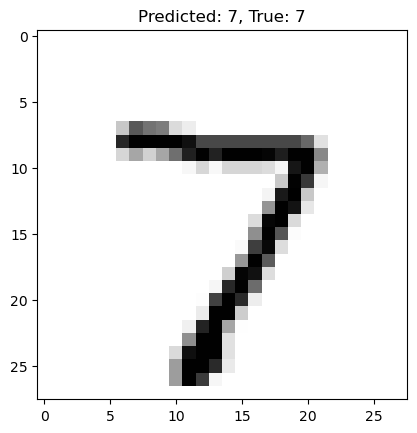

In [10]:
# Select an index to display an example
index = 0  # Change this to see different examples

# Display the image
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
plt.title(f"Predicted: {predicted_classes[index]}, True: {np.argmax(y_test[index])}")
plt.show()

## LeNet Model (Classical Model)

### Model Creation

In [11]:
# Define the LeNet-5 model architecture
LeNet_Model = Sequential()
LeNet_Model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
LeNet_Model.add(MaxPooling2D(pool_size=(2, 2)))
LeNet_Model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
LeNet_Model.add(MaxPooling2D(pool_size=(2, 2)))
LeNet_Model.add(Flatten())
LeNet_Model.add(Dense(120, activation='relu'))
LeNet_Model.add(Dense(84, activation='relu'))
LeNet_Model.add(Dense(10, activation='softmax'))

### Compiling

In [12]:
# Compile the model
LeNet_Model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

### Fitting

In [13]:
# Train the model
LeNet_Model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8024 - loss: 0.6819 - val_accuracy: 0.9733 - val_loss: 0.0853
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9698 - loss: 0.0962 - val_accuracy: 0.9817 - val_loss: 0.0574
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9807 - loss: 0.0651 - val_accuracy: 0.9836 - val_loss: 0.0513
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0511 - val_accuracy: 0.9817 - val_loss: 0.0541
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9893 - loss: 0.0340 - val_accuracy: 0.9885 - val_loss: 0.0356
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9886 - val_loss: 0.0341
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.

### Evaluating

In [15]:
# Evaluate the model
scores = LeNet_Model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

Test accuracy: 98.99%


### Predicting

In [16]:
# Predict the probabilities for the test set
predictions = LeNet_Model.predict(x_test)

# Convert the probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


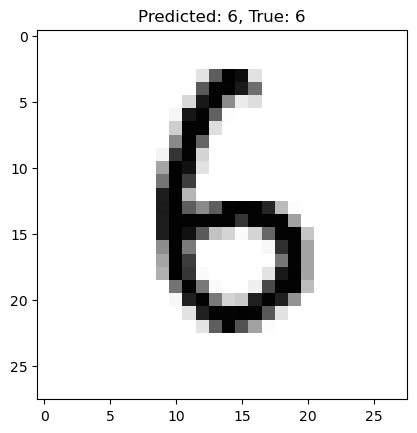

In [17]:
# Select an index to display an example
index = 21  # Change this to see different examples

# Display the image
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
plt.title(f"Predicted: {predicted_classes[index]}, True: {np.argmax(y_test[index])}")
plt.show()

In [18]:
# Print the predicted and true label
print(f"Predicted label: {predicted_classes[index]}")
print(f"True label: {np.argmax(y_test[index])}")

Predicted label: 6
True label: 6


## Deeper CNN Model

### Model Creation

In [19]:
Deeper_Model = Sequential()
Deeper_Model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
Deeper_Model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
Deeper_Model.add(MaxPooling2D(pool_size=(2, 2)))
Deeper_Model.add(Flatten())
Deeper_Model.add(Dense(128, activation='relu'))
Deeper_Model.add(Dense(10, activation='softmax'))

### Compiling

In [20]:
Deeper_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting

In [21]:
# Train the model
Deeper_Model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.8889 - loss: 0.3569 - val_accuracy: 0.9853 - val_loss: 0.0430
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9886 - val_loss: 0.0359
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9891 - val_loss: 0.0304
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9963 - loss: 0.0121 - val_accuracy: 0.9886 - val_loss: 0.0367
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9901 - val_loss: 0.0339
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9980 - loss: 0.0068 - val_accuracy: 0.9900 - val_loss: 0.0401
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9973 - loss: 0.0078 - 

### Evaluating

In [22]:
# Evaluate the model
scores = Deeper_Model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {scores[1]*100:.2f}%")

Test accuracy: 99.03%


### Predicting

In [24]:
# Predict the probabilities for the test set
predictions =Deeper_Model.predict(x_test)

# Convert the probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


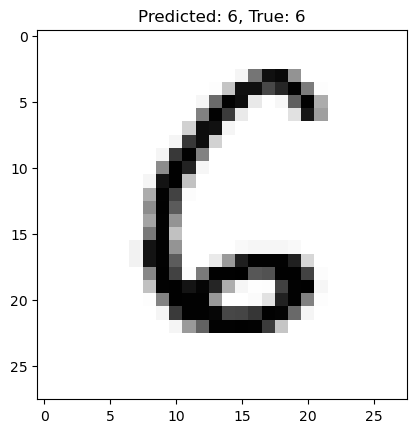

In [26]:
# Select an index to display an example
index = 98# Change this to see different examples

# Display the image
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
plt.title(f"Predicted: {predicted_classes[index]}, True: {np.argmax(y_test[index])}")
plt.show()

In [27]:
# Print the predicted and true label
print(f"Predicted label: {predicted_classes[index]}")
print(f"True label: {np.argmax(y_test[index])}")

Predicted label: 6
True label: 6
